In [3]:
#this program will only work zumi python library 1.2
from zumi.zumi import Zumi
import time
import IPython.display


zumi = Zumi()
zumi.reset_gyro()

zumi.MIN_I2C_DELAY = 0.01

#best circle fit for compass data
xc =  -640.3895135559609 
yc =  1597.617698370909  
r =  672.7384713784771
#r = 1
# x center  -640.3895135559609 
# Y center  1597.617698370909 
# Radius  720.7244584305457


#adjust compass
calibration_matrix = [ [1.0, 0.0, -xc],
                       [0.0, 1.0, -yc], 
                       [0.0, 0.0, 1.0]]

print(zumi.compass.set_calibration(calibration_matrix))
init_heading = zumi.compass.get_bearing()
#with this program you can compare the gyro drift versus the compass
while(1):
    print(init_heading-zumi.update_angles()[2], " ", zumi.compass.get_bearing()," ", zumi.compass.get_magnet())
    IPython.display.clear_output(wait=True) 

151.50232087962638   144.97035179155506   [-1096.610486444039, 774.382301629091]


KeyboardInterrupt: 

In [3]:
#this attempts to calibrate the
#compass using the max and min values detected
xc = 0
yc = 0
zc = 0

x,y,z = zumi.compass.get_magnet_raw()
#initialize them

xmax = x
ymax = y
zmax = z

xmin = x
ymin = y
zmin = z

while(1):
    x,y,z = zumi.compass.get_magnet_raw()
    
    xmax  = max(x,xmax)
    ymax  = max(y,ymax)
    zmax  = max(z,zmax)
    
    xmin  = min(x,xmin)
    ymin  = min(y,ymin)
    zmin  = min(z,zmin)
    
    val =  [xmax,ymax,zmax,xmin,ymin,zmin,xc,yc,zc]
    
    x_adj = x-xc
    y_adj = y-yc
    z_adj = z-zc
    sum_ = ((x-xc)**2+(y-yc)**2+(z-zc)**2)**0.5
    print(x_adj," ",y_adj," ",z_adj," "," ",sum_, " ", val )
    IPython.display.clear_output(wait=True) 
    

-828   1288   4243     4510.828859533467   [267, 2902, 6437, -2395, 496, 3952, 0, 0, 0]


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


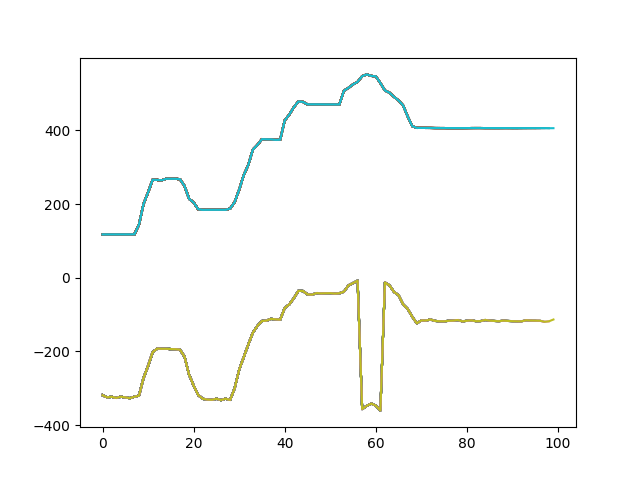

In [38]:
#this program is very VERY SLOW dont use it

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

list_comp = [] 
list_mpu = []

#fig = plt.figure()
fig = plt.gcf()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range (0,100):
    list_mpu.append(zumi.update_angles()[2])
    list_comp.append(-1*zumi.compass.get_bearing())
    
    #ax.clear()
    ax.plot(list_comp)
    ax.plot(list_mpu)
    fig.canvas.draw()

In [ ]:
!